In [1]:
%run 'Initialize Console.ipynb'

/home/ihs01/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
display(ChooseBox)

In [4]:
df = initConsole(table, dBase, new, df)

In [5]:
#df['cp'] = (df['coilcsv_rms']/0.33) * df['coilv_rms']

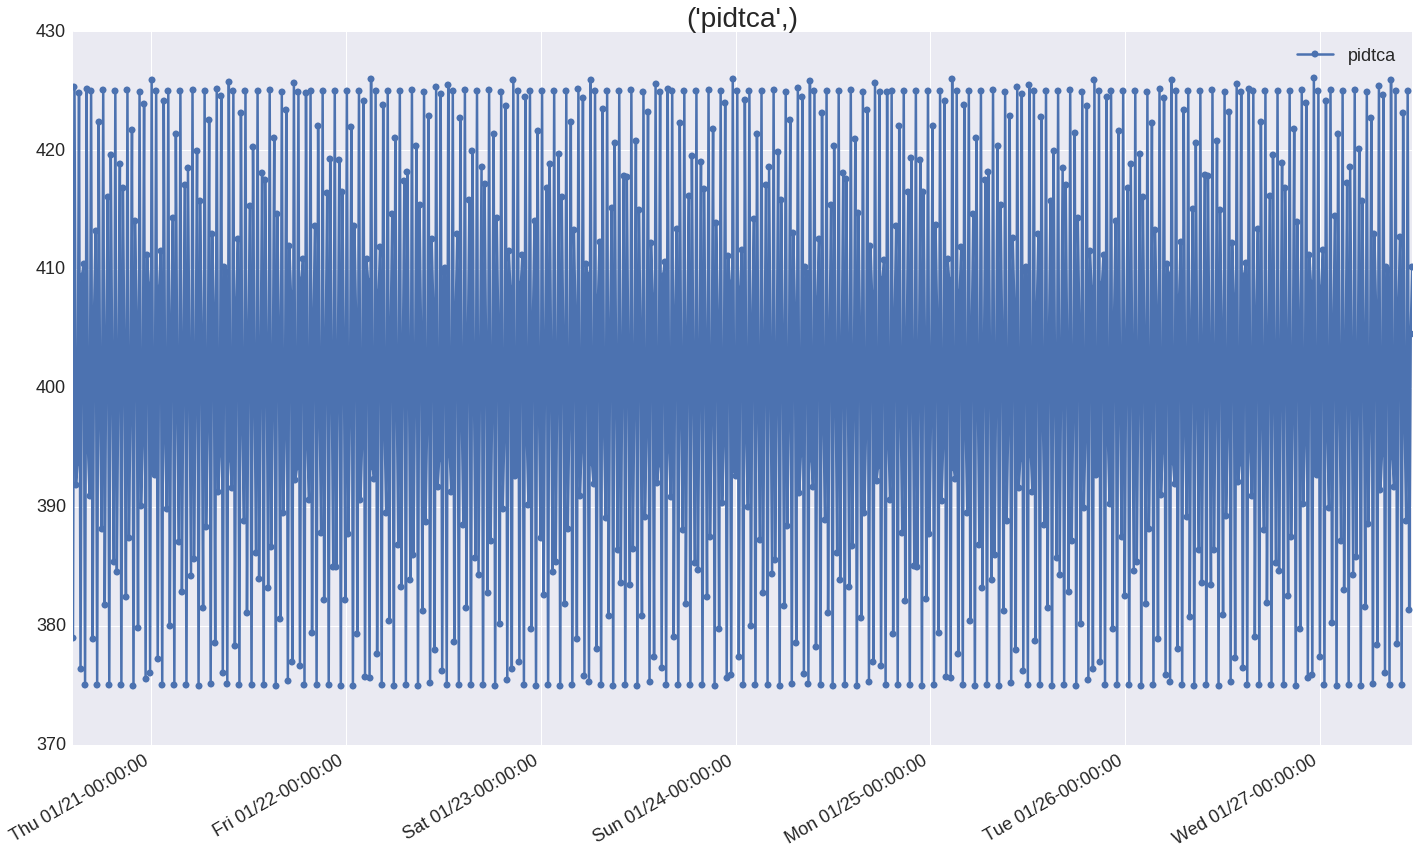

In [6]:
iSlidePlot(df)

In [7]:
def jointPlot(df, sig1='pha', sig2='pidtca', deltaTime=5, start=185000, end=195000, xl='x', yl='y'):
    temp = df.ix[start:end,:]
    dt = str(deltaTime) + 's'
    a = temp[sig1].resample(dt)
    b = temp[sig2].resample(dt)

#     sns.jointplot(a,b, kind="kde")
#     sns.jointplot(a,b).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    
    g = sns.jointplot(a,b, kind="kde", size=6).plot_joint(plt.scatter, c='#4CB391')
    plt.xlabel(xl, fontsize=20)
    plt.ylabel(yl, fontsize=20)
    #plt.title('Joint Probability Density', fontsize=15 )
    plt.tick_params(axis="both", labelsize=15)
    plt.legend(fontsize=20)

    g.plot_marginals(sns.distplot, hist=True, kde=True)
    g.ax_joint.collections[0].set_alpha(0)
    

    
def iJointPlot(df, MAX_RESAMP_TIME=RESAMP_MAX, DELTA_SAMP=DELTA_SAMP_MIN, DELTA_TIME=1):
    if df.empty:
        print 'Null DataFrame'
    else:

        %matplotlib inline
    
        attributes = df.columns.tolist()
        MAX_NUM = len(df)-2

        sigWid1 = widgets.Select(
        description = "Signal",
        options=df.columns.tolist(),
        value='pha'
        )

        sigWid2 = widgets.Select(
        description = "Signal",
        options=df.columns.tolist(),
        value='pidtca'
        )

        resampMethodWid = widgets.RadioButtons(
        description='Resample Method',
        options=['mean', 'rms'],
        value='mean',
        )

        resampRateWid = widgets.IntSlider(
        value=10000,
        min=1,
        max=MAX_RESAMP_TIME,
        step=DELTA_SAMP,
        description='Resample Rate (s)', 
        continuous_update=False,
        )

        startWid = widgets.IntSlider(
        value=0,
        min=0,
        max=len(df),
        step=DELTA_TIME,
        description='Start Sample', 
        continuous_update=False,
        )

        endWid = widgets.IntSlider(
        value=len(df),
        min=0,
        max=len(df),
        step=DELTA_TIME,
        description='End Sample', 
        continuous_update=False,
        )
        
        xlWid = widgets.Text(
        description='X Label:',
        value='xlabel',
        continuous_update=False,    
        )
        
        ylWid = widgets.Text(
        description='Y Label:',
        value='ylabel',
        continuous_update=False,    
        )
        
    
        interact(jointPlot, df=fixed(df), 
             sig1=sigWid1,
             sig2=sigWid2,
             deltaTime=resampRateWid, 
             start=startWid, 
             end=endWid, xl=xlWid, yl=ylWid, __manual=True)



In [8]:
### 150, 20000, 189000
### 300, 270000, 480000
### 450, 500000, 670000

In [9]:
# df1 = df
# df1['ce'] = (df1['coilcsv_rms']/0.33) * df1['coilv_rms']
# df1['ce1'] = df1['coilenergy'] / 0.2
# df1['ce2'] = df1['ce'] * .2


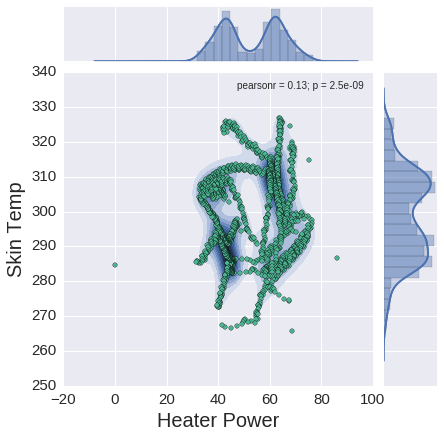

In [10]:
iJointPlot(df)

In [36]:
iJointPlot(df)

In [16]:
iJointPlot(df)

In [38]:
def sPlot(dfIn, signal=('atc1_mean',), resample_rate_in_sec=120000, 
              start=0, end=len(df), resampMethod='rms'):
    dfIn = dfIn.ix[start:end,:]
    col = list(signal)
    title = signal
    dt = str(resample_rate_in_sec) + 'ms'
    if resampMethod == 'rms' : resampMethod = resampleRMS

    # get x,y for plot
    out = dfIn[col].resample(dt,how=resampMethod)
    rng = pd.to_datetime(out.index)

    
    
    fig, ax = plt.subplots(1,1, figsize=[14,7])
    ax.plot_date(rng.to_pydatetime(), out, 'v-', lw=2.5, marker='o')
    fig.autofmt_xdate()

    ax.xaxis.set_major_formatter(dates.DateFormatter('%a %m/%d-%H:%M:%S'))
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

    #plt.title(title, fontsize=28, ha="center")  
    plt.tick_params(axis='y', labelsize=18)
    plt.tick_params(which='minor',axis='x', labelsize=18)
    plt.tick_params(which='major', axis='x', labelsize=18)
    plt.legend(col, fontsize=18, loc='best')
    plt.tight_layout()
    fig.canvas.draw()
    return 


In [11]:
def sPlot(dfIn, signal=('atc1_mean',), resample_rate_in_sec=120000, 
              start=0, end=len(df), resampMethod='rms'):
    dfIn = dfIn.ix[start:end,:]
    col = list(signal)
    title = signal
    dt = str(resample_rate_in_sec) + 'ms'
    if resampMethod == 'rms' : resampMethod = resampleRMS

    # get x,y for plot
    out = dfIn[col].resample(dt,how=resampMethod)
    rng = pd.to_datetime(out.index)

    
    
    fig, ax = plt.subplots(1,1, figsize=[14,7])
    ax.plot_date(rng.to_pydatetime(), out, '-', lw=2)
    fig.autofmt_xdate()

    ax.xaxis.set_major_formatter(dates.DateFormatter('%a %m/%d-%H:%M:%S'))
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

    #plt.title(title, fontsize=28, ha="center")  
    plt.tick_params(axis='y', labelsize=18)
    plt.tick_params(which='minor',axis='x', labelsize=18)
    plt.tick_params(which='major', axis='x', labelsize=18)
    plt.legend(col, fontsize=18, loc='best')
    plt.tight_layout()
    fig.canvas.draw()
    return 


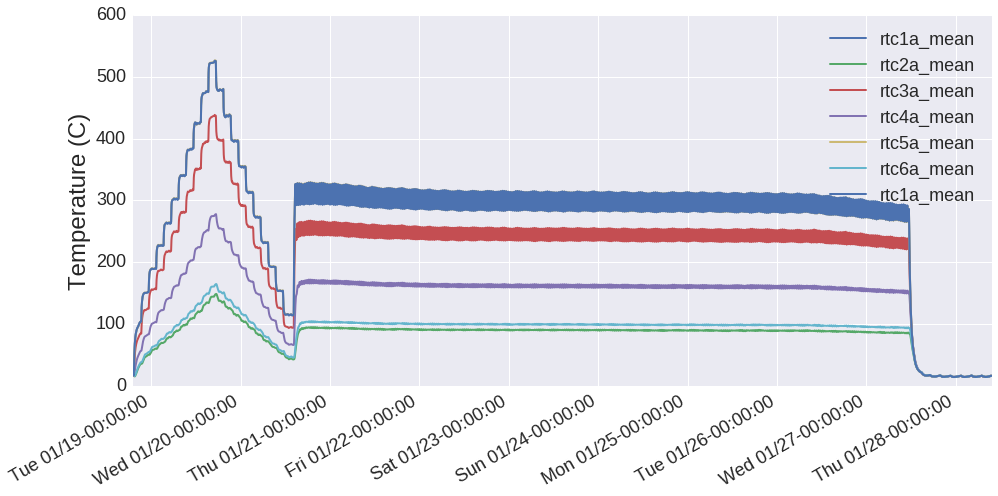

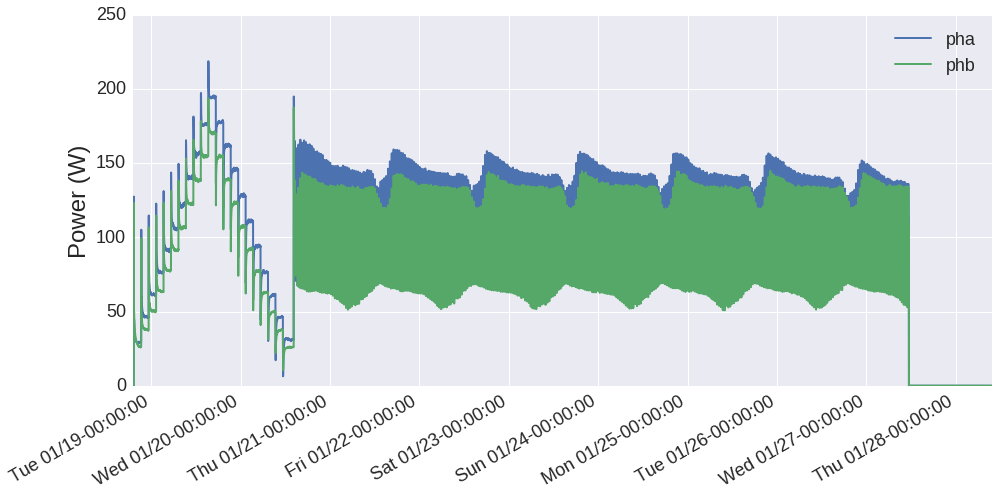

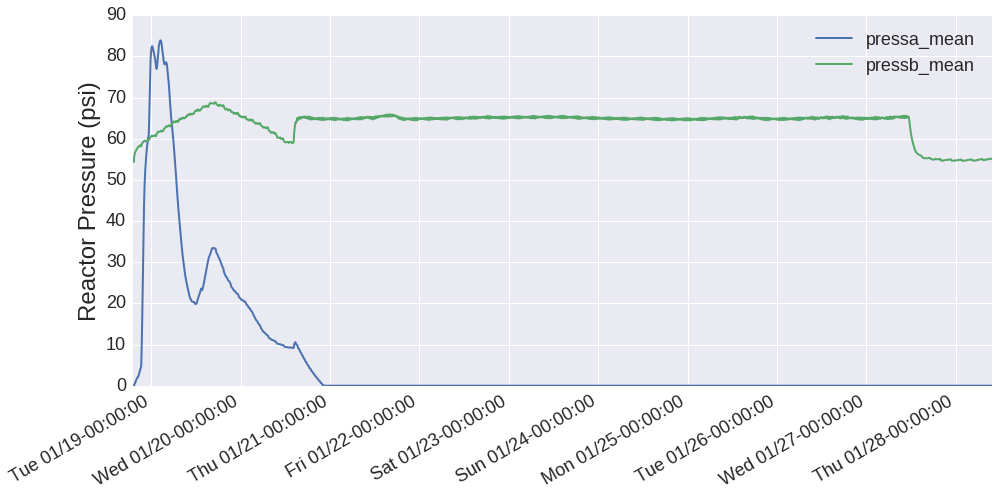

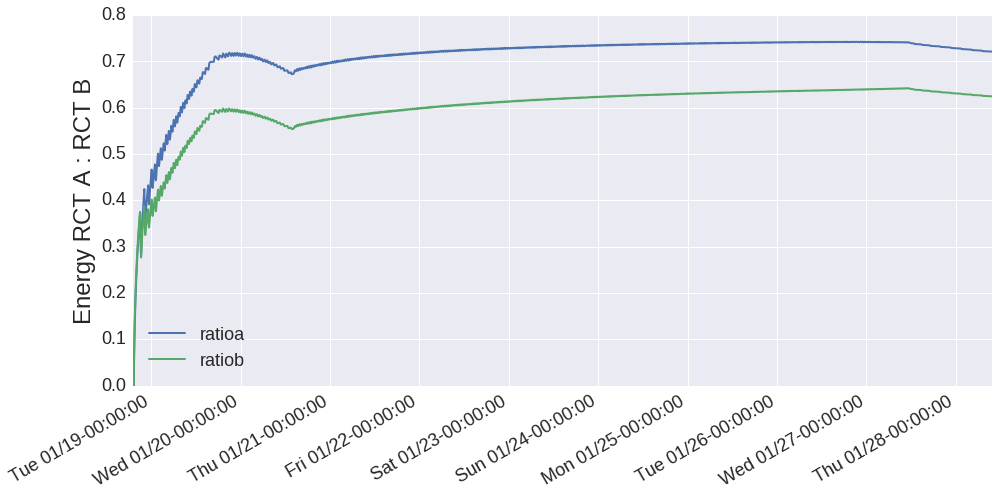

In [12]:
sPlot(df, signal=('rtc1a_mean','rtc2a_mean','rtc3a_mean','rtc4a_mean','rtc5a_mean','rtc6a_mean','rtc1a_mean',), )
plt.ylabel('Temperature (C)', fontsize=24)

sPlot(df, signal=('pha','phb',))
plt.ylabel('Power (W)', fontsize=24)

sPlot(df, signal=('pressa_mean','pressb_mean',))
plt.ylabel('Reactor Pressure (psi)', fontsize=24)

sPlot(df, signal=('ratioa','ratiob',))
plt.ylabel('Energy RCT A : RCT B', fontsize=24)



In [ ]:
df['ratio'] = df['eha'] / df['ehb']

In [ ]:
df.ratio.plot()